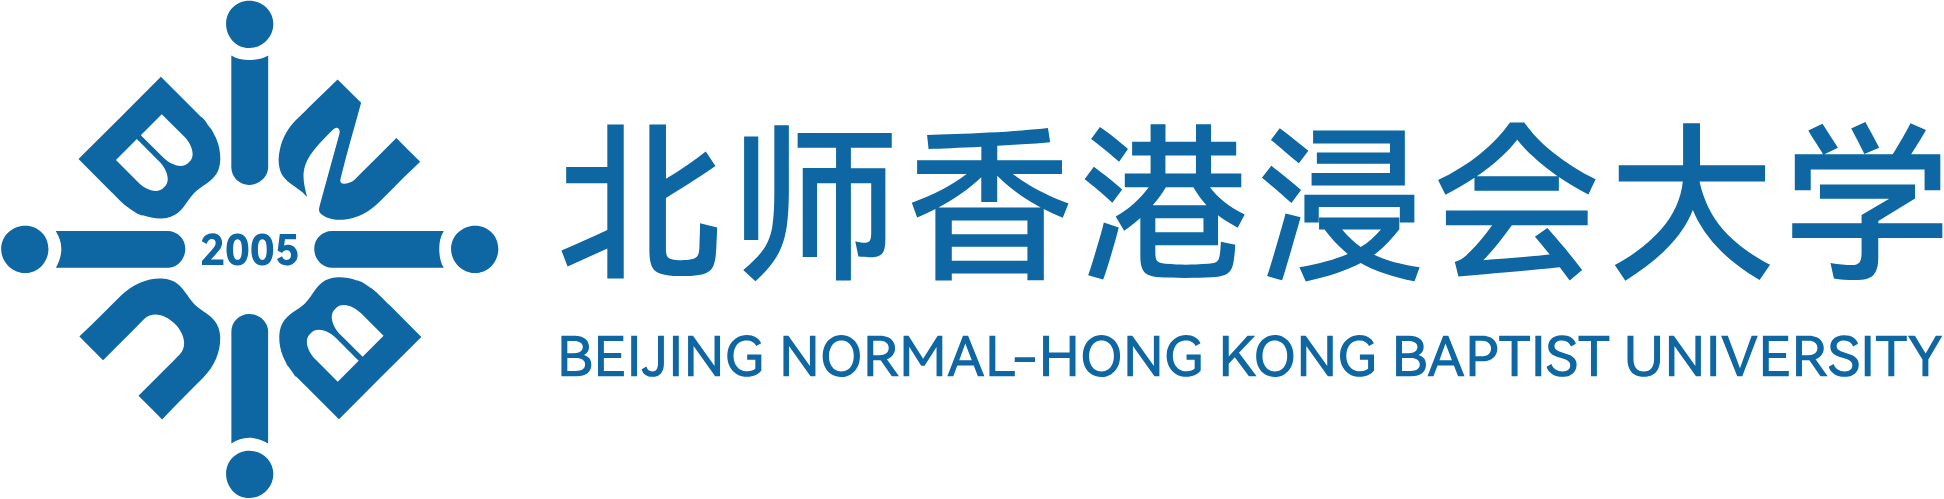

# NUMERICAL AND SIMULATION TECHNIQUES IN FINANCE (FINM4053)
## ASSIGNMENT 2 &nbsp;&nbsp;&nbsp;&nbsp; \| &nbsp;&nbsp;&nbsp;&nbsp; 2025/10/20

---
## Student name: 陈冲之（William）
## Student ID: 2230018005
---

# Instructions

Consider the following first-order partial differential equation
$$
{\large\begin{array}{lll}
{\large \frac{\partial u}{\partial t}+a\frac{\partial u}{\partial x}=0} & , & t>0,\ x\in\mathbb{R}\\
u(0,x)=f(x) & , & x\in\mathbb{R}
\end{array}}
$$
where the unknown function $u=u(t,x)$ is a function of two variables $t$ (time) and $x$ (space), $a>0$ is a constant, and the differentiable function $f=f(x)$ defines the initial condition of $u$.

### **Question 1**  &nbsp;&nbsp; (5 points)

Verify that the analytical solution of the PDE is given by 
$$
{\large\left.\begin{array}{lll}
u(t,x)=f(x-at) & , & t{\geq}0,\ x\in\mathbb{R}\end{array}\right.}
$$


---

At time $t = 0$:
$$
\Large
u(0, x) = f(x - a * 0) = f(x)
$$
verified.

For $\frac{\partial u}{\partial t}+a\frac{\partial u}{\partial x}$:
$$
\Large
\begin{align}
\frac{\partial u}{\partial t} & = \frac{\partial f}{\partial t} = f'(-a) \\
a\frac{\partial u}{\partial x} & = a\frac{\partial f}{\partial x} = af' 
\end{align}
$$

So, $(1) + (2) = 0$.
verified.




---

We are going to approximate the solution of the PDE by finite-difference schemes. Introduce the uniform grids
$$
{\large\begin{array}{lll}
t_{i}=i\times\Delta_{t}\ , & i=0,1,\ldots,N & \mathrm{where}\ \Delta_{t}=\frac{t_{N}}{N}\\
x_{j}=x_{0}+j\times\Delta_{x}\ , & j=0,1,\ldots,M & \mathrm{where}\ \Delta_{x}=\frac{x_{M}-x_{0}}{M}
\end{array}}
$$
Denote $u_{i,j}$ as the approximation of the solution $u(t_i,x_j)$ at time $t_i$ and space $x_j$. Similarly, define $f_j=f(x_j)$ for all $j=0,1,\ldots,M$.

### **Question 2**  &nbsp;&nbsp; (6 points)

Write a finite-difference scheme to approximate the solution of the PDE, where the time derivative $\frac{\partial u}{\partial t}$ is approximated by **forward difference**, and the space derivative $\frac{\partial u}{\partial x}$ is approximated by **backward difference**. <br>

> We call this finite difference scheme **Forward in Time, Backward in Space (FTBS)**. <br>

Show that this finite difference scheme can be written in the following form:
$$
{\large\left.\begin{array}{lll}
u_{i+1,j}=(1-\lambda)u_{i,j}+\lambda u_{i,j-1} & , & 0\leq i\leq N-1,\ 1\leq j\leq M\\
u_{0,j}=f_{j} & , & 0\leq j\leq M
\end{array}\right.}
$$
What is the definition of $\lambda$?  

---

For the statement, we know that:
$$
\Large
U_t(t_i, X_j) \approx \frac{u_{i + 1, j} - u_{i, j}}{\Delta_t} \\
U_x(t_i, X_j) \approx \frac{u_{i, j} - u_{i, j - 1}}{\Delta_x}
$$

We replace the partial derivatives by the finite-difference approximation:
$$
\Large 
\frac{u_{i + 1, j} - u_{i, j}}{\Delta_t} + a\frac{u_{i,j} - u_{i, j - 1}}{\Delta_x} = 0
$$
Define $b = a\Delta_t$ and $c = \Delta_x$.

For $j = 1, ..., M$,
$$
\Large
c\left( u_{i + 1, j} - u_{i,j} \right) + b\left( u_{i, j} - u_{i, j - 1} \right) = 0
$$

After rearranging, we have:
$$
\Large
\begin{aligned}
u_{i + 1, j} & =  \frac{c - b}{c}u_{i, j} +  \frac{b}{c}u_{i, j - 1} \\
u_{i + 1, j} & =  \frac{\Delta_x - a\Delta_t}{\Delta_x}u_{i, j} +  \frac{a\Delta_t}{\Delta_x}u_{i, j - 1}
\end{aligned}
$$
Thus, we have：
$$ 
\Large
\lambda = \frac{a\Delta_t}{\Delta_x}
$$


---

### **Question 3**  &nbsp;&nbsp; (4 points)

Introduce the vector $\mathbf{u_{i}}=[\begin{array}{cccc}u_{i,0} & u_{i,1} & \ldots & u_{i,M}\end{array}]^{\top}$. 

Write the FTBS scheme using matrix-vector notations as
$$
{\large\mathbf{u_{i+1}}=\mathbf{A_r}\cdot\mathbf{u_{i}}+\mathbf{B_r}{{\times}}u_{i,-1}}
$$
where $\mathbf{A_r}\in\mathbb{R}^{(M+1)\times(M+1)}$ is a constant matrix, $\mathbf{B_r}\in\mathbb{R}^{M+1}$ is a constant vector, and $u_{i,-1}=u(t_i,x_0-\Delta_x)$ is a **boundary condition** which needs to be provided in order to solve the finite-difference scheme.

What is the definition of $\mathbf{A_r}$ and $\mathbf{B_r}$?  

---

Based on Question 2, we know that, the $j = 0, \cdots, M$ equations at time $i$ are:
$$
\Large
\begin{aligned}
u_{i + 1, 0} & = & (1 - \lambda) u_{i, 0} & + \lambda u_{i, -1} \\
u_{i + 1, 1} & = & (1 - \lambda) u_{i, 1} & + \lambda u_{i, 0} \\
\vdots & = & \vdots &  \\ 
u_{i + 1, M} & = & (1 - \lambda) u_{i, M} & + \lambda u_{i, M - 1}
\end{aligned}
$$
In matrix notation, the system of equation is,
$$
\Large
\mathbf{u}_{i + 1, 0:M} = \mathbf{P}\mathbf{u}_{i, -1:M}
$$
where $\mathbf{P}$ is a $(M + 1)\times (M + 2)$ matrix:
$$
\mathbf{P} = 
\begin{bmatrix}
\lambda_{-1} & (1 - \lambda)_0 & 0 & \cdots & \cdots & 0 \\
0 & \lambda_0 & (1 - \lambda)_1 & \cdots & \cdots & \vdots \\
\vdots & & \ddots & \ddots & & \vdots \\
\vdots & & & \lambda_{M - 2} & (1 - \lambda)_{M - 1} & 0 \\
0 & \cdots & \cdots & \cdots & \lambda_{M - 1} & (1 - \lambda)_{M}
\end{bmatrix}
$$
Therefore, we have $\mathbf{A_r}\in \R^{(M + 1)\times(M + 1)}$ and $\mathbf{B_r}\in \R^{M + 1}$:
$$
{\color{yellow}\mathbf{A_r}} = 
\begin{bmatrix}
(1 - \lambda)_0 & 0 & \cdots & \cdots & 0 \\
\lambda_0 & (1 - \lambda)_1 & \cdots & \cdots & \vdots \\
\vdots & \ddots & \ddots & & \vdots \\
\vdots & & \lambda_{M - 2} & (1 - \lambda)_{M - 1} & 0 \\
0 & \cdots & \cdots & \lambda_{M - 1} & (1 - \lambda)_{M}
\end{bmatrix}
, \quad\quad
{\color{yellow}\mathbf{B_r}} = 
\begin{bmatrix}
\lambda_{-1} \\
0 \\
\vdots \\
\vdots \\
0
\end{bmatrix}
$$
$\mathbf{P} = \Bigg[ \mathbf{B_r} \Biggm| \mathbf{A_r} \Bigg]$





---

### **Question 4**  &nbsp;&nbsp; (7 points)

For simplicity in this exercise, we use the analytical solution to define the boundary condition:
$$
{\large u_{i,-1}=f(x_0-\Delta_x-at_i)}
$$
Implement the FTBS finite-difference scheme in Python. 

Use the following numerical parameters:
$$
{\large t_N=2, \ \ x_0=-4, \ \ x_M=4, \ \ a=1, \ \ f(x)=\frac{1}{\pi(1+x^2)}}
$$
Remark that $f$ is the probability distribution function of a standard **Cauchy** random variable. 

For $N$ and $M$, test the following combinations:
$$
{\large(N,M)\in\{(50,25),(150,75),(500,250)\}}
$$
Plot the solution you obtain for $\{u_{N,j}\}_{j=0,\ldots,M}$ (terminal solution). 

It should look like the following:

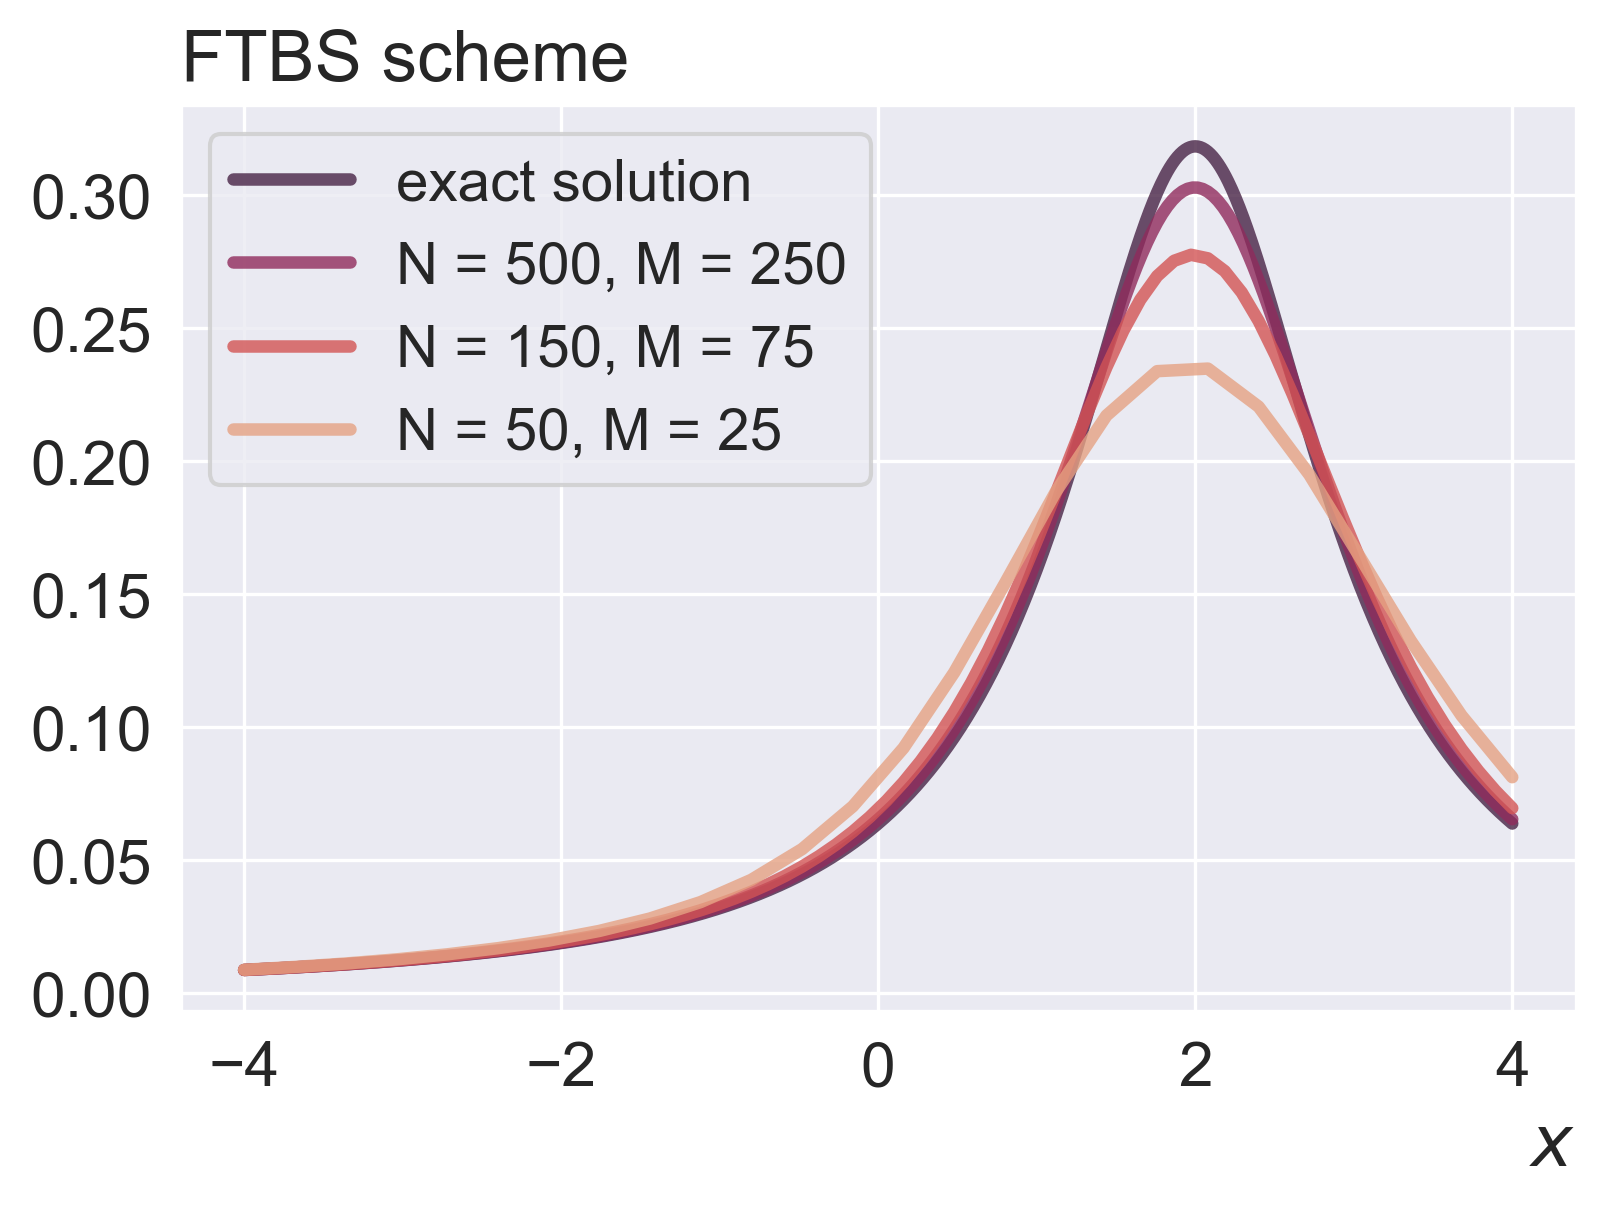

In [41]:
import numpy as np
from scipy.sparse import diags
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.dpi': 300,
    'font.size': 18, 
    'axes.labelsize': 18, 
    'legend.fontsize': 17,
    'axes.titlesize': 18, 
    'xtick.labelsize': 17, 
    'ytick.labelsize': 17
})
sns.set_style("darkgrid")

In [42]:
def f(x):
    """
    Initial Condition - Cauchy distribution
    """
    return 1 / (np.pi * (1 + x ** 2))

def FTBS_Scheme(x0, xM, tN, N, M, a):
    """
    Utilize FTBS (Forward in Time, Backward in Space) finite-difference scheme to solve first-order PDE.

    Parameters:
    tN: 
        Terminal time
    x0, xM: 
        Space boundaries
    a: 
        Constant coefficient
    N, M: 
        Time and Space grid points
    """
    dt = tN / N
    dx = (xM - x0) / M
    lam = a * dt / dx

    tgrid = np.linspace(0.0, tN, N + 1)
    xgrid = np.linspace(x0, xM, M + 1)

    U = np.zeros([N + 1, M + 1])

    # Initial condition
    U[0, :] = f(xgrid)

    # Boundary condition
    xbound = x0 - dx - a * tgrid
    ubound = f(xbound)

    # Matrix construction
    diagonals = (1 - lam) * np.ones(M + 1)
    lower_diag = lam * np.ones(M)
    A = diags([diagonals, lower_diag], [0, -1])
    B = np.zeros(M + 1)
    B[0] = lam

    # Algorithm implementation
    for i in range(N):
        U[i + 1, :] = A @ U[i, :] + B * ubound[i]

    return U[N, :], xgrid

def FTBS_plot():
    tN, x0, xM, a = 2, -4.0, 4.0, 1.0
    xgrid = np.linspace(x0, xM, 1001)
    
    fig = plt.figure()
    ax = fig.add_subplot()

    y_analytical = f(xgrid - a * tN)
    sns.lineplot(x = xgrid, y = y_analytical, label = "exact solution", linewidth = 3, alpha = 0.6, ax = ax)
    
    grids = [(500, 250), (150, 75), (50, 25)]
    for idx, (N, M) in enumerate(grids):
        y_numerical, xgrid_numerical = FTBS_Scheme(x0, xM, tN, N, M, a = 1)
        sns.lineplot(x = xgrid_numerical, y = y_numerical, label = f"N = {N}, M = {M}", linewidth = 3, alpha = 0.6, ax = ax)

    sns.despine()
    ax.set_title(f"FTBS Solution at $t$ = {tN}", loc = "left")
    ax.set_xlabel("$x$", loc = "right")
    ax.set_ylabel("$u_{t, x}$")
    fig.tight_layout(pad = 0.2)
    plt.show()


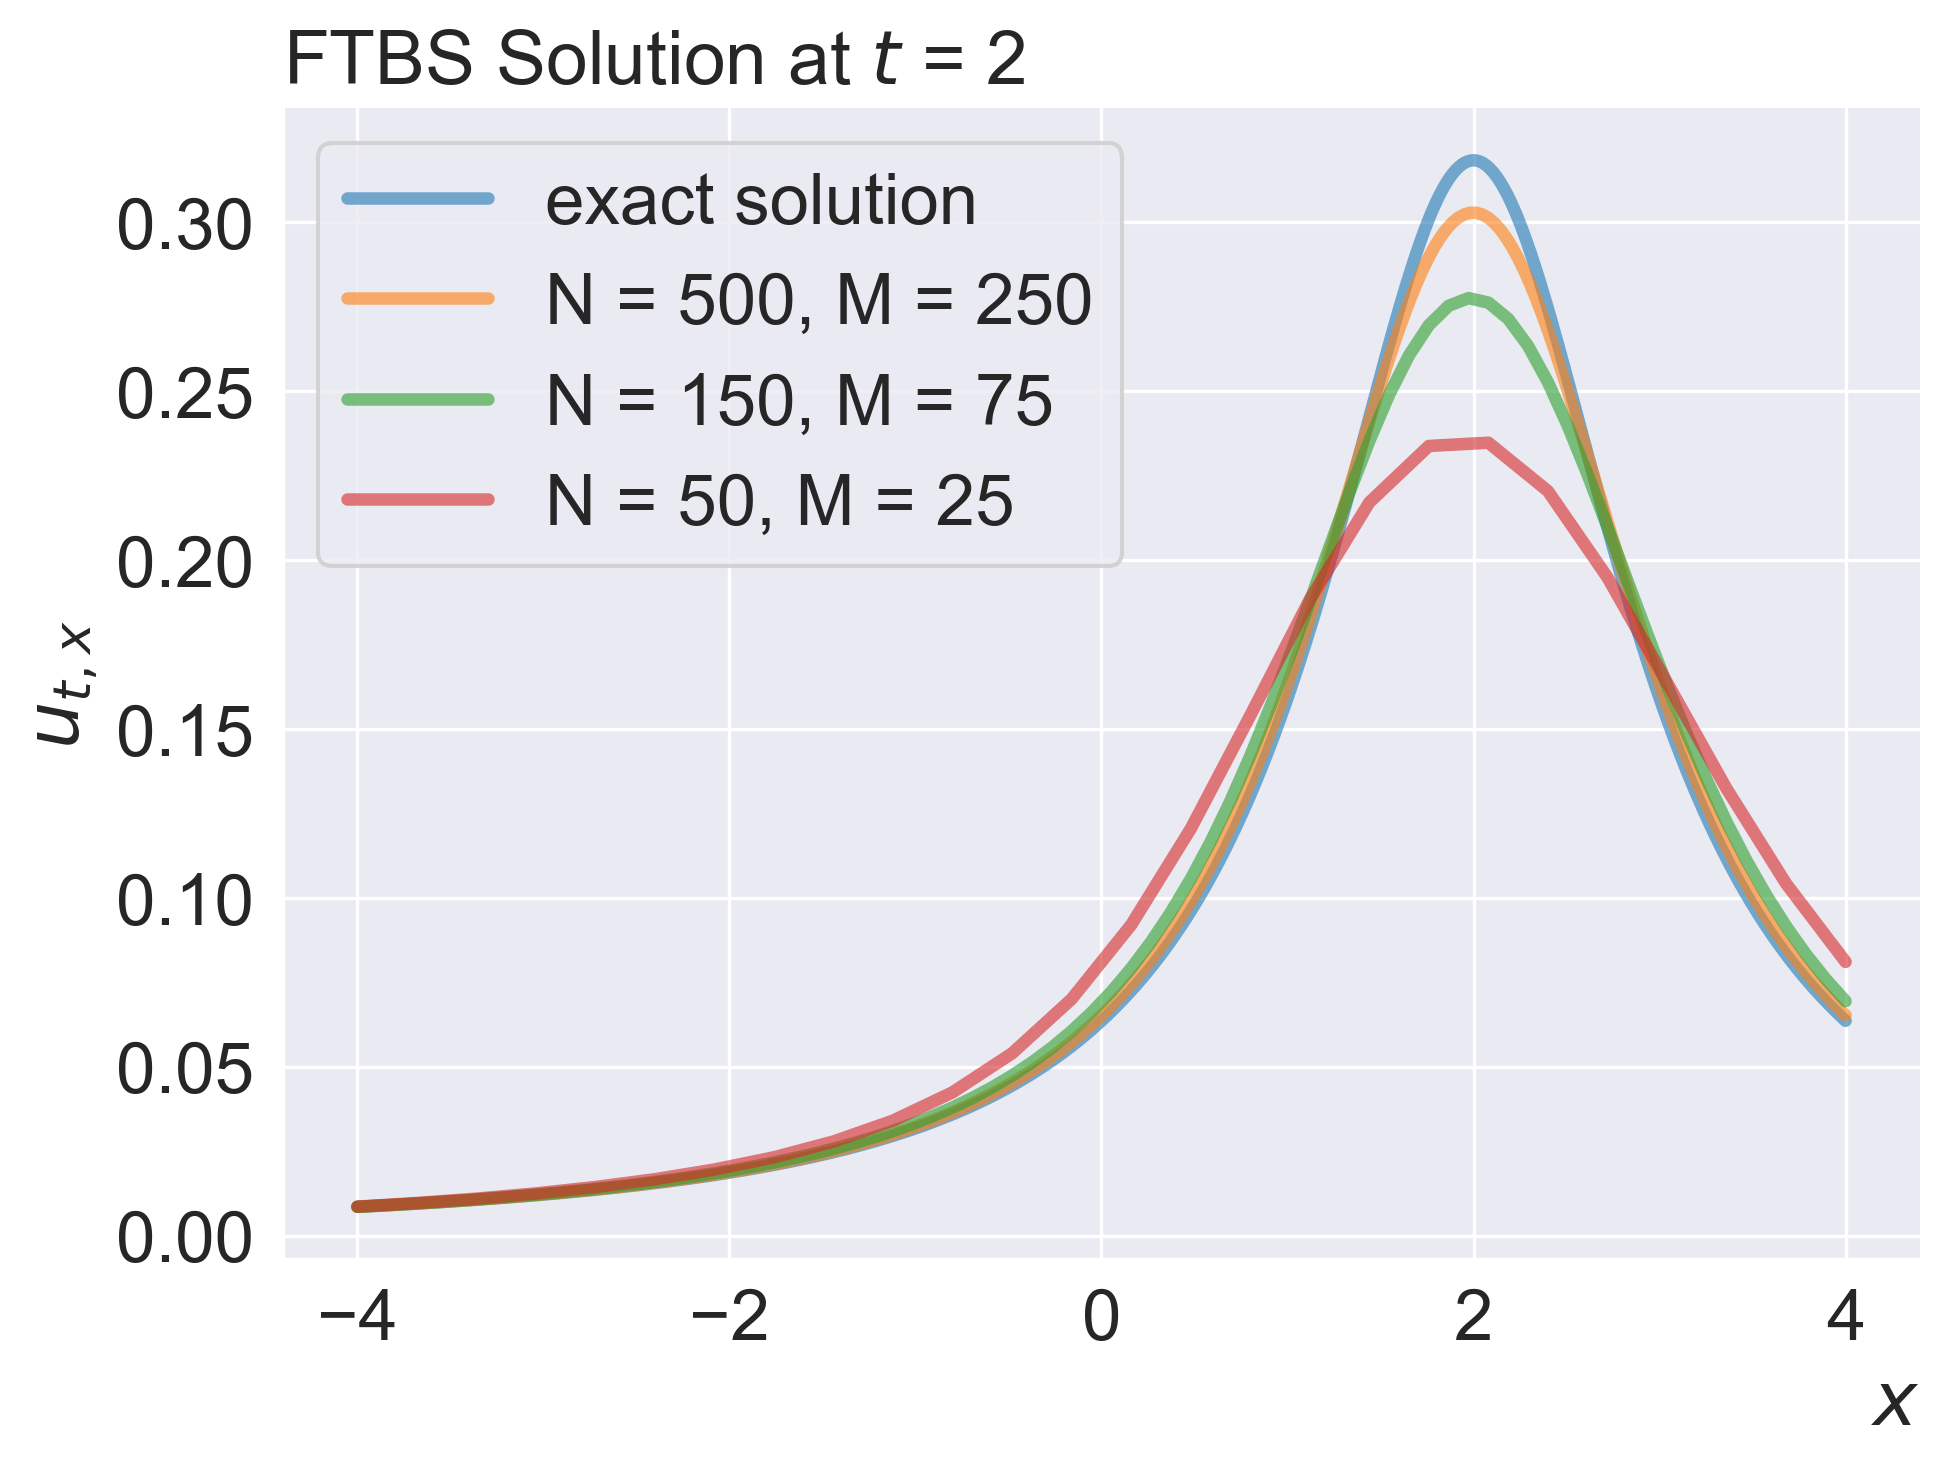

In [43]:
FTBS_plot()

---

### **Question 5**  &nbsp;&nbsp; (4 points)

What happens to your numerical solution if you choose $M$ much larger than $N$, for example $N=50$ and $M=500$. 

Why?  


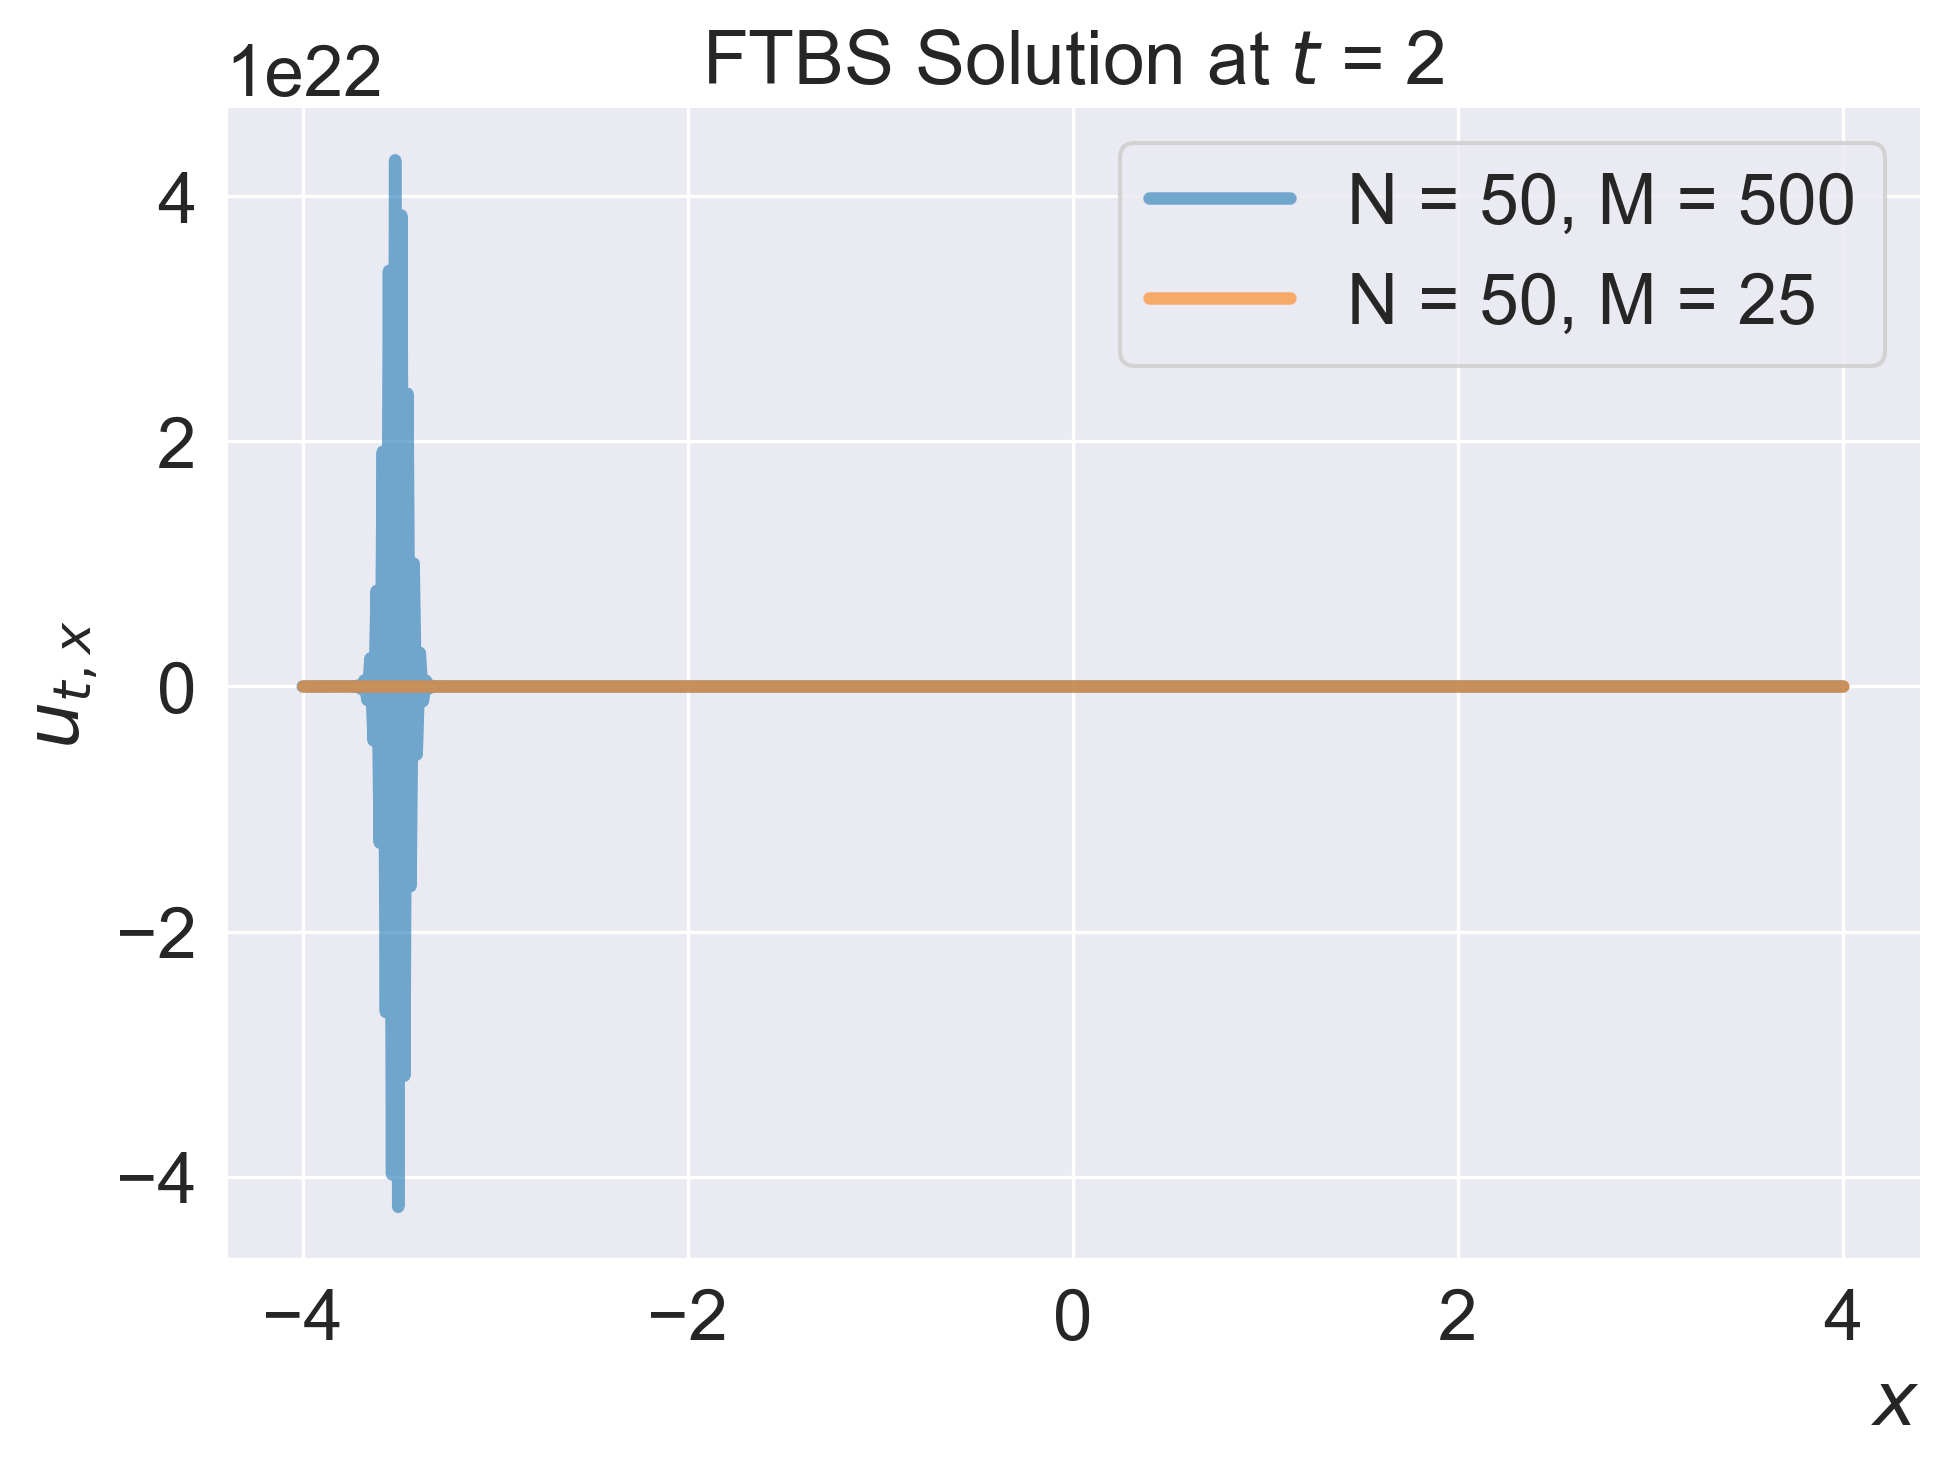

In [51]:
def M_Greater_N():
    tN, x0, xM, a = 2, -4.0, 4.0, 1.0
    xgrid = np.linspace(x0, xM, 1001)
        
    fig = plt.figure()
    ax = fig.add_subplot()

    grids = [(50, 500), (50, 25)]
    for idx, (N, M) in enumerate(grids):
        y_numerical, xgrid_numerical = FTBS_Scheme(x0, xM, tN, N, M, a = 1)
        sns.lineplot(x = xgrid_numerical, y = y_numerical, label = f"N = {N}, M = {M}", linewidth = 3, alpha = 0.6, ax = ax)

    sns.despine()
    ax.set_title(f"FTBS Solution at $t$ = {tN}", loc = "center")
    ax.set_xlabel("$x$", loc = "right")
    ax.set_ylabel("$u_{t, x}$")
    fig.tight_layout(pad = 0.2)
    plt.show()

M_Greater_N()

When choosing $M$ much greater than $N$, the numerical solution becomes unstable.

In the FBTS scheme, stability depends on $\lambda = \frac{a\Delta_t}{\Delta_x}$, where $\Delta_t = \frac{t_N}{N}$ and $\Delta_x = \frac{x_M - x_0}{M}$.<br>

For stability, the FBTS scheme requires $0 \le \lambda\le 1$.

For example, for $t_N = 2, x_0 = -4, x_M = 4, a = 1$, if $N = 50$ and $M = 500$, we have:
$$
\Delta_t = \frac{2}{50} = 0.04 \\
\Delta_x = \frac{8}{500} = 0.016 \\
$$ 
Thus, we get:
$$
\lambda = \frac{1\times 0.04}{0.016} = 2.5 > 1
$$

When $\lambda > 1$, the coefficient of $u_{i,j}$ become negative in $u_{i+1,j}=(1-\lambda)u_{i,j}+\lambda u_{i,j-1}$, causing sign changes and amplitude growth during time iterations. This results in oscillations and divergeence.




---

### **Question 6**  &nbsp;&nbsp; (6 points)

Write another finite difference scheme to approximate the solution of the PDE, where the time derivative $\frac{\partial u}{\partial t}$ is approximated by **backward difference**, and the space derivative $\frac{\partial u}{\partial x}$ is approximated by **backward difference**. 

> We call this finite difference scheme **Backward in Time, Backward in Space (BTBS)**. 

Show that this finite difference scheme can be written in the following form:
$$
{\large\left.\begin{array}{lll}
(1+\lambda)u_{i+1,j}=u_{i,j}+\lambda u_{i+1,j-1} & , & 0\leq i\leq N-1,\ 1\leq j\leq M\\
u_{0,j}=f_{j} & , & 0\leq j\leq M
\end{array}\right.}
$$

What is the definition of $\lambda$?  


---

---

### **Question 7**  &nbsp;&nbsp; (4 points)

Write the BTBS scheme using matrix-vector notations as

$${\large\mathbf{A_\ell}\cdot\mathbf{u_{i+1}}=\mathbf{u_{i}}+\mathbf{B_\ell}{{\times}}u_{i+1,-1}}$$
where $\mathbf{A_\ell}\in\mathbb{R}^{(M+1)\times(M+1)}$ is a constant matrix, $\mathbf{B_\ell}\in\mathbb{R}^{M+1}$ is a constant vector, and $u_{i+1,-1}=u(t_{i+1},x_0-\Delta_x)$ is once again a **boundary condition** which needs to be provided in order to solve the finite-difference scheme. What is the definition of $\mathbf{A_\ell}$ and $\mathbf{B_\ell}$?  

---

---

### **Question 8**  &nbsp;&nbsp; (7 points)

Once again, use the analytical solution to define the boundary condition $u_{i+1,-1}$. Implement the BTBS finite-difference scheme in Python. Use the same numerical parameters as in question 4. Plot the solution you obtain for $\{u_{N,j}\}_{j=0,\ldots,M}$. It should look like the following:

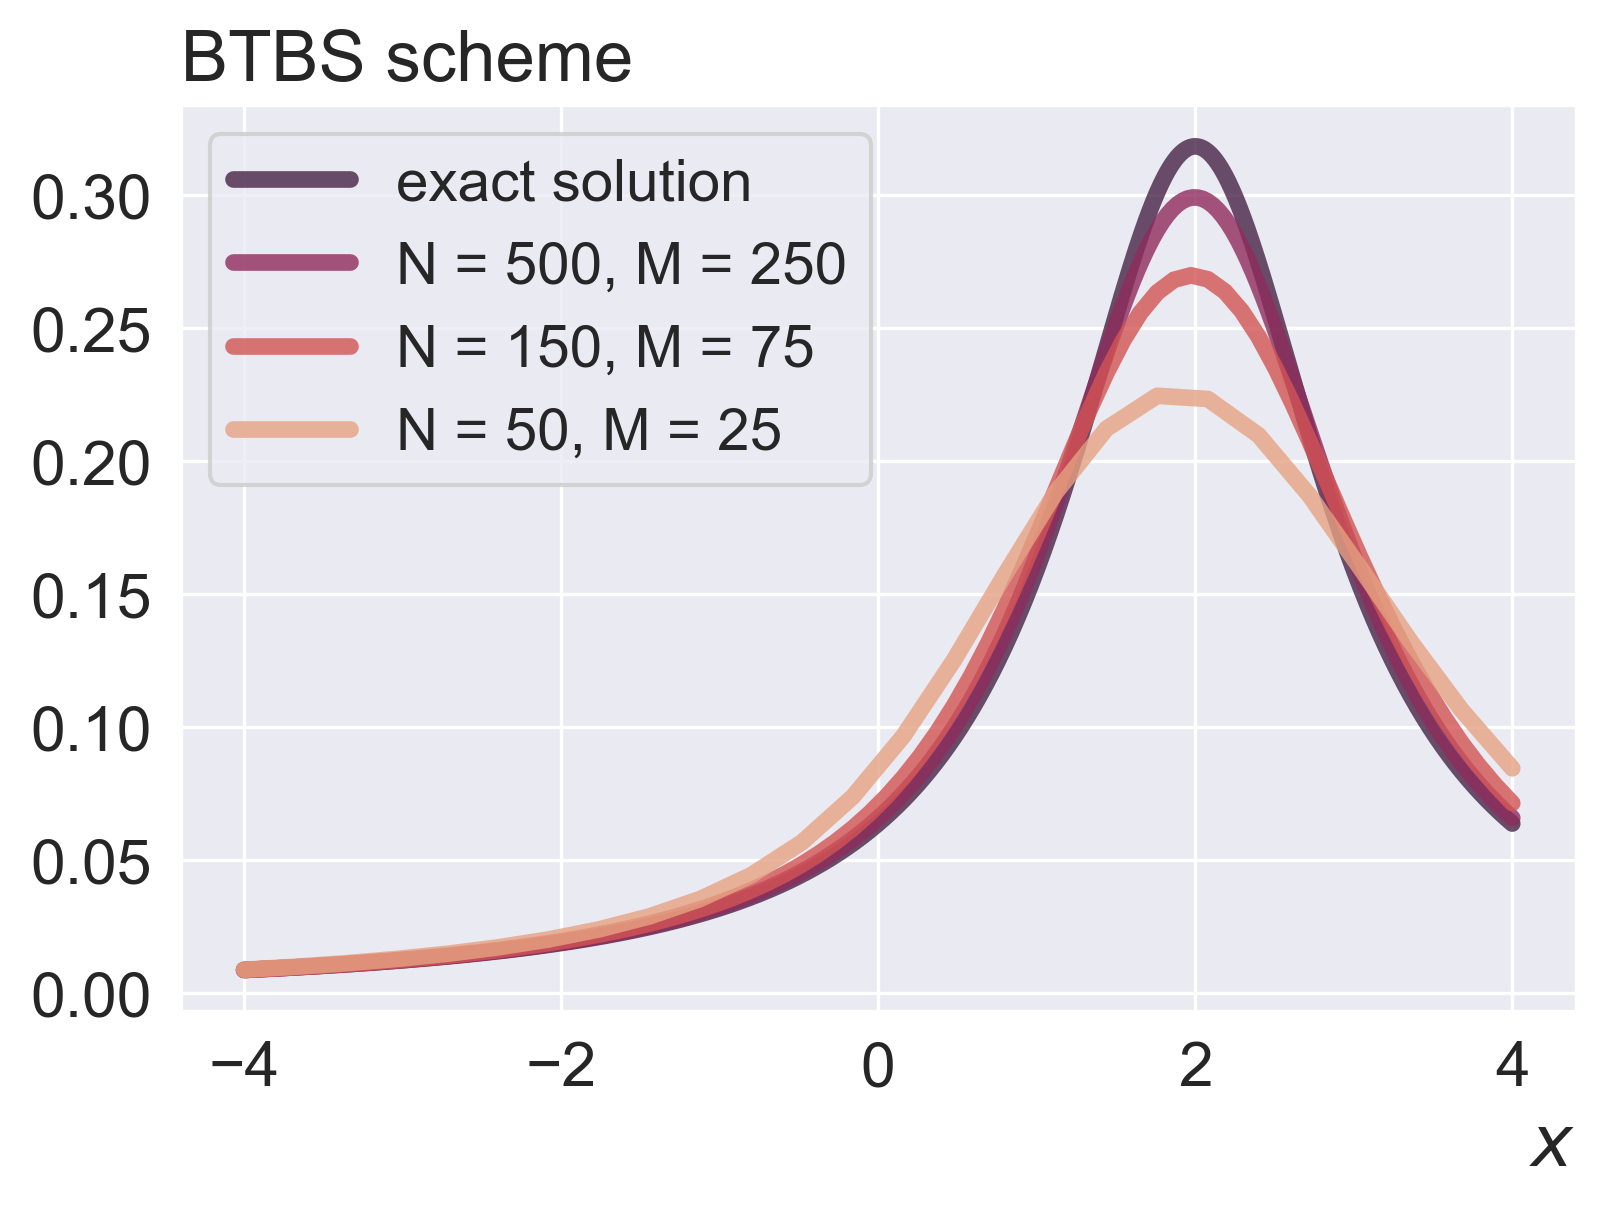

### **Question 9**  &nbsp;&nbsp; (7 points)

What happens to your numerical solution if you choose $M$ much larger than $N$, for example $N=50$ and $M=500$?  
Set $M=2{\times}N$, and find the lowest $N>0$ such that the maximum absolute error between the analytical solution at time $t_N$ and the BTBS scheme solution at time $t_N$ on the grid $\{x_{j}\}_{j=0,1,\ldots,M}$ is lower than $0.02$.  

***Write your answer here***
<br>
<br>
<br>




